In [1]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,plot_confusion_matrix, confusion_matrix, accuracy_score,roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_pickle('saved_df.pkl')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

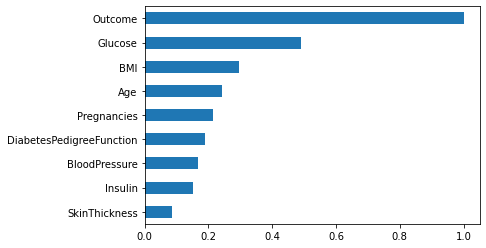

In [4]:
df.corr()['Outcome'].sort_values().plot.barh()

In [5]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42) 

In [6]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [7]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42) 

In [8]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [9]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        94
           1       0.59      0.48      0.53        48

    accuracy                           0.71       142
   macro avg       0.67      0.65      0.66       142
weighted avg       0.70      0.71      0.70       142



RANDOM FOREST

In [10]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [11]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        94
           1       0.67      0.60      0.64        48

    accuracy                           0.77       142
   macro avg       0.74      0.73      0.73       142
weighted avg       0.76      0.77      0.76       142



RF TUNING

In [12]:
rf = RandomForestClassifier()
rf_params = { "n_estimators" : [50,100,300], 
             "max_depth" : [3,5,7] , 
             "max_features":[4,6,8], 
             "min_samples_split":[2,4,6],
            }

In [13]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [14]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 4, 'min_samples_split': 6, 'n_estimators': 50}

In [15]:
rf_tuned = RandomForestClassifier(n_estimators =500, max_depth =5, max_features = 4, min_samples_split = 6).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        94
           1       0.70      0.54      0.61        48

    accuracy                           0.77       142
   macro avg       0.75      0.71      0.72       142
weighted avg       0.76      0.77      0.76       142



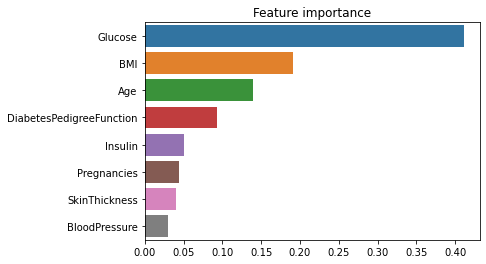

In [16]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.title("Feature importance")
plt.show()

XGBOOST

In [17]:
conda install xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBClassifier

In [19]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

[16:30:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



TUNING XGBOOST

In [20]:
xgb = XGBClassifier()

In [21]:
xgb_params = { "n_estimators" : [50,100,300], 
             "max_depth" : [3,5,7] , 
             "subsample":[0.5,0.8,1], 
             "learning_rate":[0.1, 0.01, 0.3],
            }

In [22]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[16:32:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [24]:
xgb_tuned = XGBClassifier(n_estimators = 200,learning_rate = 0.3,max_depth = 5, subsample = 1).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

[16:32:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        94
           1       0.70      0.54      0.61        48

    accuracy                           0.77       142
   macro avg       0.75      0.71      0.72       142
weighted avg       0.76      0.77      0.76       142



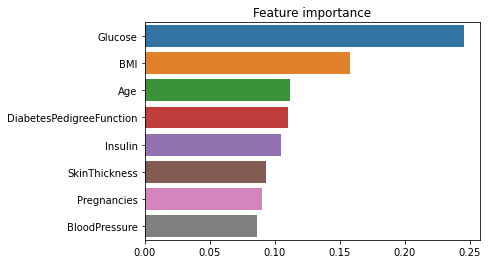

In [25]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.title("Feature importance")
plt.show()

TELECOM DATASET

In [26]:
df = pd.read_csv('telecom_churn.csv')

In [27]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [28]:
df.columns 

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [29]:
df = pd.get_dummies(df, columns=['international plan', 'voice mail plan','churn'])

In [30]:
df.head()

,state,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,churn_False,churn_True
0,KS,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1,1,0
1,OH,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1,1,0
2,NJ,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0,1,0
3,OH,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0,1,0
4,OK,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [32]:
df[(df['churn_True']==1) & (df['international plan_yes']==1)].shape

(137, 24)

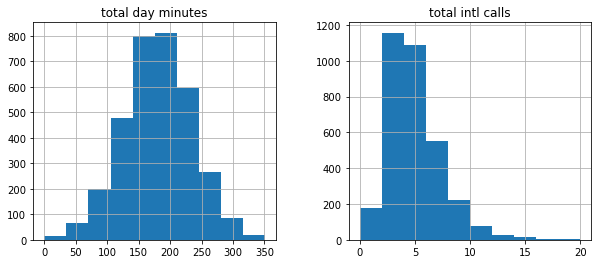

In [33]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4));

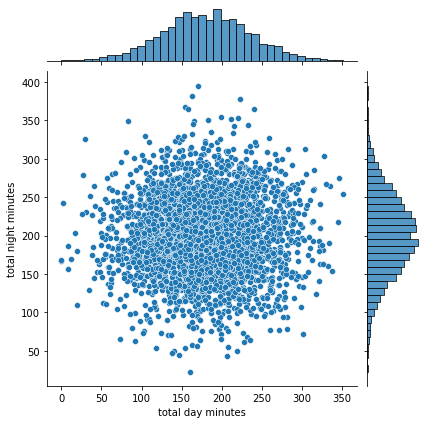

In [34]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df, kind = 'scatter');

In [35]:
df = pd.read_csv('telecom_churn.csv')
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


In [36]:
pd.crosstab(df['churn'], df['international plan'], normalize = True)

international plan,no,yes
churn,,
False,0.79928,0.055806
True,0.10381,0.041104


<AxesSubplot:>

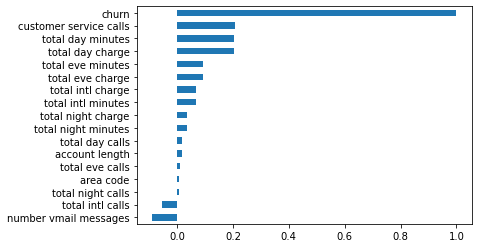

In [37]:
df.corr()['churn'].sort_values().plot.barh()

In [38]:
df.drop(['phone number', 'state'], axis = 1, inplace = True)

In [39]:
df = pd.get_dummies(df, columns=['international plan', 'voice mail plan'])


In [40]:
X = df.drop(['churn'], axis = 1)
y = df['churn']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42) 

In [41]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

[16:32:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       570
        True       0.90      0.73      0.81        97

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



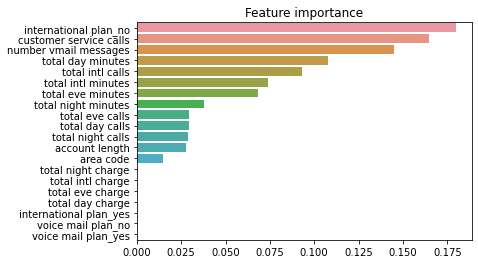

In [42]:
feature_imp = pd.Series(xgb_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.title("Feature importance")
plt.show()

In [43]:
xgb = XGBClassifier()
xgb_params = { "n_estimators" : [50,100,300], 
             "max_depth" : [3,5,7] , 
             "subsample":[0.5,0.8,1], 
             "learning_rate":[0.1, 0.01, 0.3],
            }
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train,y_train)
xgb_cv_model.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[16:35:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}

In [44]:
xgb_tuned = XGBClassifier(n_estimators = 100,learning_rate = 0.1,max_depth = 7, subsample = 1).fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

[16:35:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       570
        True       0.92      0.73      0.82        97

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



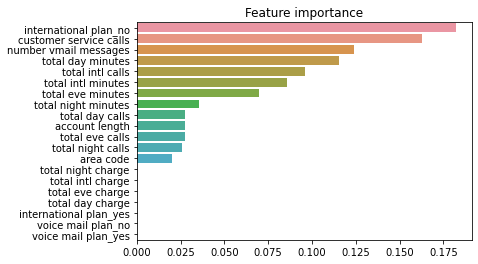

In [45]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.title("Feature importance")
plt.show()

In [46]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.98      0.91       570
        True       0.32      0.06      0.10        97

    accuracy                           0.84       667
   macro avg       0.59      0.52      0.51       667
weighted avg       0.78      0.84      0.80       667



In [47]:
import os
print(os.listdir())

['Exercises.ipynb', '.DS_Store', 'saved_df.pkl', 'filled_scout_20200923.csv', 'exercise_2.ipynb', 'telecom_churn.csv', '.ipynb_checkpoints', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'kyphosis.csv']


In [48]:
df = pd.read_csv("filled_scout_20200923.csv")

In [49]:
df

,Unnamed: 0,Unnamed: 0.1,make_model,body_type,price,vat,km,Type,Cylinders,Fuel,Gears,Comfort&Convenience,Entertainment&Media,Extras,Safety&Security,Previous_Owners,hp_kW,Inspection_new,age,Body_Color,Paint_Type,Upholstery_type,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cons_city,cons_country,CO2_Emission,Emission_Class,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,0,0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,3.0,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",2.0,66.0,1,3.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,1220.0,front,3.8,4.3,3.5,99.0,Euro 6,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,4.0,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",1.0,141.0,0,2.0,Red,Metallic,Cloth,3.0,4.0,Automatic,1798.0,1255.0,front,5.6,7.1,4.7,129.0,Euro 6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,2,2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,3.0,Diesel,6.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",1.0,85.0,0,3.0,Black,Metallic,Cloth,4.0,4.0,Automatic,1598.0,1195.0,front,3.8,4.4,3.4,99.0,Euro 6,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,3,3,Audi A1,Sedans,14500,VAT deductible,73000.000